<a href="https://colab.research.google.com/github/ayushmanZ/forecast-tata-ev/blob/main/sales_tata_EV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#importing dataset
dataset=pd.read_csv("/TATA_EV_SALES - Sheet1 (1).csv")
pd.set_option('display.max_columns',None)

In [ ]:
dataset

,monthly,time,sales
0,Mar 2020,0,2646
1,Apr 2020,1,1
2,May 2020,2,623
3,Jun 2020,3,3040
4,Jul 2020,4,4327
5,Aug 2020,5,5179
6,Sep 2020,6,6007
7,Oct 2020,7,6888
8,Nov 2020,8,6021
9,Dec 2020,9,6835


In [ ]:
#Segregrating the time series from the dataset
x=dataset.iloc[:,1:2]
y=dataset.iloc[:,-1:]

In [ ]:
y

,sales
0,2646
1,1
2,623
3,3040
4,4327
5,5179
6,6007
7,6888
8,6021
9,6835


In [ ]:
x

,time
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


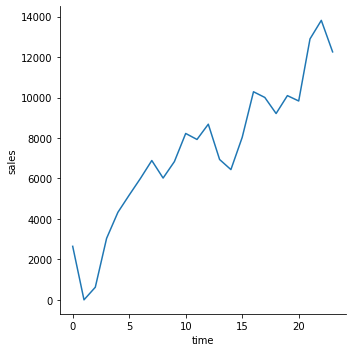

In [ ]:
#plotting given sales rate
sns.relplot(x="time", y="sales", kind="line", data=dataset)

In [ ]:
#Performing various exponential smoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
#performing Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(y, initialization_method="estimated").fit()
fcast1 = fit1.forecast(9).rename("SES")
#performing Holt's additve trend
fit2 = Holt(y, initialization_method="estimated").fit()
fcast2 = fit2.forecast(9).rename("Holt's")
#performing Holt's multiplicative trend
fit3 = Holt(y, exponential=True, initialization_method="estimated").fit()
fcast3 = fit3.forecast(9).rename("Exponential")
#performing Holt's method with additive damping
fit4 = Holt(y, damped_trend=True, initialization_method="estimated").fit(damping_trend=0.9)
fcast4 = fit4.forecast(9).rename("Additive Damped")
#performing Holt's method with multiplicaive damping
fit5 = Holt(y, exponential=True, damped_trend=True, initialization_method="estimated").fit()
fcast5 = fit5.forecast(9).rename("Multiplicative Damped")

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


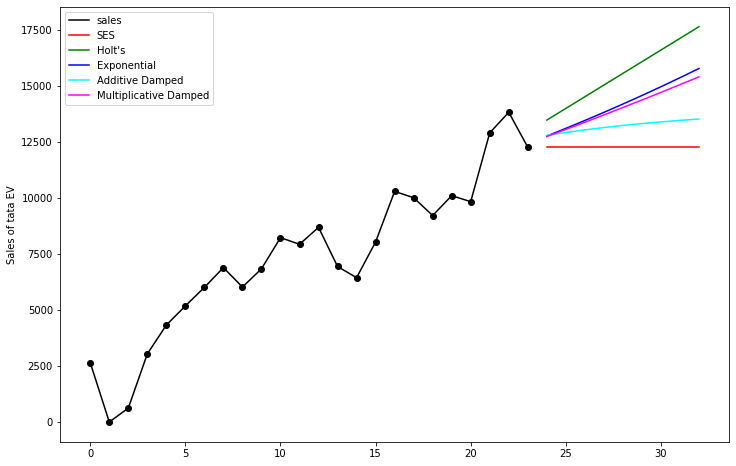

In [29]:
#plotting all the forecasts
ax = y.plot(color="black", marker="o", figsize=(12, 8))
fcast1.plot(ax=ax, color="red", legend=True)
fcast2.plot(ax=ax, color="green", legend=True)
fcast3.plot(ax=ax, color="blue", legend=True)
fcast4.plot(ax=ax, color="cyan", legend=True)
fcast5.plot(ax=ax, color="magenta", legend=True)
ax.set_ylabel("Sales of tata EV")
plt.show()
#considering both additive damped and exponential 

In [ ]:
#Forecast values are stored in array
yhat4=fit4.forecast(17)

In [30]:
yhat3=fit3.forecast(17)

In [ ]:
yhat4

24    12789.129375
25    12916.689914
26    13031.494398
27    13134.818435
28    13227.810067
29    13311.502537
30    13386.825759
31    13454.616659
32    13515.628469
33    13570.539099
34    13619.958665
35    13664.436274
36    13704.466123
37    13740.492987
38    13772.917164
39    13802.098924
40    13828.362508
dtype: float64

In [31]:
yhat3

24    12755.535317
25    13098.330987
26    13450.339039
27    13811.807051
28    14182.989250
29    14564.146699
30    14955.547475
31    15357.466861
32    15770.187536
33    16193.999776
34    16629.201661
35    17076.099277
36    17535.006939
37    18006.247409
38    18490.152121
39    18987.061417
40    19497.324788
dtype: float64

In [ ]:
y_new=np.append(y,yhat4)

In [32]:
y_new2=np.append(y,yhat3)

In [ ]:
y_new

array([2.64600000e+03, 1.00000000e+00, 6.23000000e+02, 3.04000000e+03,
       4.32700000e+03, 5.17900000e+03, 6.00700000e+03, 6.88800000e+03,
       6.02100000e+03, 6.83500000e+03, 8.22500000e+03, 7.92900000e+03,
       8.68300000e+03, 6.93800000e+03, 6.43900000e+03, 8.03300000e+03,
       1.02870000e+04, 1.00060000e+04, 9.21100000e+03, 1.00960000e+04,
       9.83100000e+03, 1.28990000e+04, 1.38160000e+04, 1.22590000e+04,
       1.27891294e+04, 1.29166899e+04, 1.30314944e+04, 1.31348184e+04,
       1.32278101e+04, 1.33115025e+04, 1.33868258e+04, 1.34546167e+04,
       1.35156285e+04, 1.35705391e+04, 1.36199587e+04, 1.36644363e+04,
       1.37044661e+04, 1.37404930e+04, 1.37729172e+04, 1.38020989e+04,
       1.38283625e+04])

In [33]:
y_new2

array([2.64600000e+03, 1.00000000e+00, 6.23000000e+02, 3.04000000e+03,
       4.32700000e+03, 5.17900000e+03, 6.00700000e+03, 6.88800000e+03,
       6.02100000e+03, 6.83500000e+03, 8.22500000e+03, 7.92900000e+03,
       8.68300000e+03, 6.93800000e+03, 6.43900000e+03, 8.03300000e+03,
       1.02870000e+04, 1.00060000e+04, 9.21100000e+03, 1.00960000e+04,
       9.83100000e+03, 1.28990000e+04, 1.38160000e+04, 1.22590000e+04,
       1.27555353e+04, 1.30983310e+04, 1.34503390e+04, 1.38118071e+04,
       1.41829892e+04, 1.45641467e+04, 1.49555475e+04, 1.53574669e+04,
       1.57701875e+04, 1.61939998e+04, 1.66292017e+04, 1.70760993e+04,
       1.75350069e+04, 1.80062474e+04, 1.84901521e+04, 1.89870614e+04,
       1.94973248e+04])

In [ ]:
#storing the addition damped forecast value in a dataframe
out=pd.DataFrame({'Forecast':y_new})
final=pd.concat([x,out],axis=1)

In [34]:
#storing the exponential forecast value in a dataframe 
out=pd.DataFrame({'Forecast2':y_new2})
final=pd.concat([x,out],axis=1)

In [ ]:
#exporting final dataset into xlsx file
final.to_excel('Forecast.xlsx')

In [35]:
final.to_excel('Forecast2.xlsx')

In [ ]:
from google.colab import files

with open('Forecast.xlsv', 'w') as f:
  f.write('some content')

files.download('Forecast.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
from google.colab import files

with open('Forecast2.xlsv', 'w') as f:
  f.write('some content')

files.download('Forecast2.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>